In [338]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import bootstrap
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

### Data concatenet 

In [339]:
df_clean_data_1 = pd.read_csv('..\data\diabetics_clean_data\diabetes_012_health_indicators_BRFSS2015.csv')
df_clean_data_2 = pd.read_csv('..\data\diabetics_clean_data\diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df_clean_data_3 = pd.read_csv('..\data\diabetics_clean_data\diabetes_binary_health_indicators_BRFSS2015.csv')
df_clean_data_2=df_clean_data_2.rename(columns={'Diabetes_binary':'Diabetes_012' })

df_1_1_2 = pd.concat([df_clean_data_1,df_clean_data_2]) 

df= df_1_1_2.copy()
df_1= df.copy()
df_2= df.copy()
df_3= df.copy()
df_4= df.copy()
df_5= df.copy()
# df_6= df.copy()


In [340]:
val_1= df[df['Diabetes_012']==0]
val_2= df[df['Diabetes_012']==1]
val_3= df[df['Diabetes_012']==2]
print(val_1.shape,val_2.shape,val_3.shape)

# df= df[df['Diabetes_012']!=1]

for col in df.columns:
    df[f'{col}'] = df[f'{col}'].astype(int)

print("Here we can see huge difference between three groups. here we are going to use ' Stratified sampaling '")
print("most data are in a no_diabetic dataset. So we randomly select 35.5k data on no_diabetics dataset")

(249049, 22) (39977, 22) (35346, 22)
Here we can see huge difference between three groups. here we are going to use ' Stratified sampaling '
most data are in a no_diabetic dataset. So we randomly select 35.5k data on no_diabetics dataset


Here we can see the huge number of data. We have to reduce the rows and columns. for better performance 

### Data visualization 

<Axes: xlabel='Diabetes_012', ylabel='count'>

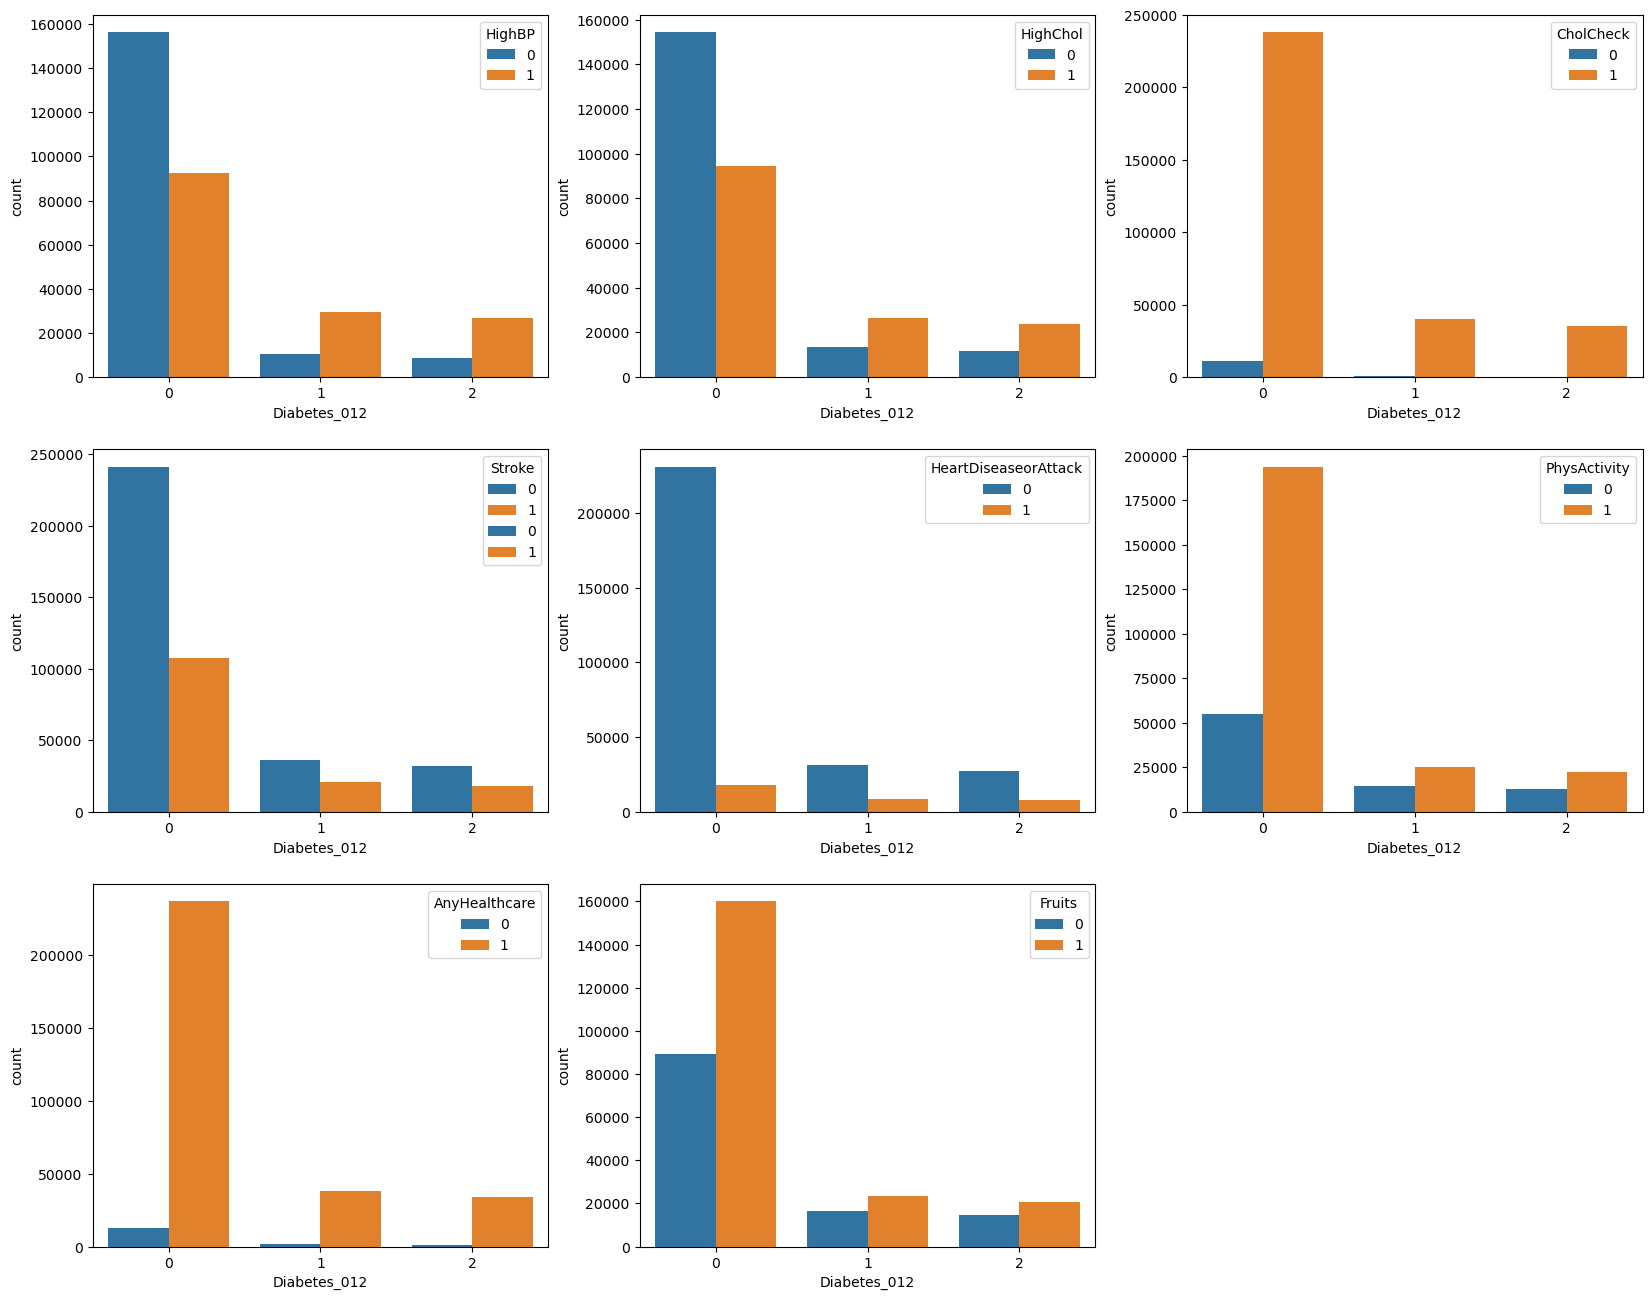

In [341]:
plt.figure(figsize=(20,16))


plt.subplot(3,3,1)
sns.countplot(data=df, x= 'Diabetes_012', hue='HighBP')

plt.subplot(3,3,2)
sns.countplot(data=df, x= 'Diabetes_012', hue='HighChol')

plt.subplot(3,3,3)
sns.countplot(data=df, x= 'Diabetes_012', hue='CholCheck')

plt.subplot(3,3,4)
sns.countplot(data=df, x= 'Diabetes_012', hue='Smoker')

plt.subplot(3,3,4)
sns.countplot(data=df, x= 'Diabetes_012', hue='Stroke')

plt.subplot(3,3,5)
sns.countplot(data=df, x= 'Diabetes_012', hue='HeartDiseaseorAttack')

plt.subplot(3,3,6)
sns.countplot(data=df, x= 'Diabetes_012', hue='PhysActivity')

plt.subplot(3,3,7)
sns.countplot(data=df, x= 'Diabetes_012', hue='AnyHealthcare')

plt.subplot(3,3,8)
sns.countplot(data=df, x= 'Diabetes_012', hue='Fruits')

# plt.subplot(3,3,9)
# sns.countplot(data=df_1_1_2, x= 'Diabetes_012', hue='CholCheck')




### Find related field 

In [342]:
def find_unique_val(df):
    column_unique ={}
    for name in df.columns:
        column_unique[f'{name}']= df[f'{name}'].unique()
    return column_unique


unique=  find_unique_val(df)



#### here we only take correlation on Diabetes_012 with other columns who have 10% or less correlation. 

In [343]:

df_corr= df.corr().iloc[0:1,:]>0.19
df_main_corr= df.corr().iloc[0:1,:]
df_main_corr

Diabetes_012    HighBP  HighChol  CholCheck      BMI    Smoker  \
Diabetes_012           1.0  0.297618  0.228786   0.077151  0.24229  0.069044   

               Stroke  HeartDiseaseorAttack  PhysActivity    Fruits  ...  \
Diabetes_012  0.11272              0.189465     -0.132141 -0.045882  ...   

              AnyHealthcare  NoDocbcCost   GenHlth  MentHlth  PhysHlth  \
Diabetes_012       0.017383     0.037528  0.328103  0.078172  0.187145   

              DiffWalk       Sex       Age  Education    Income  
Diabetes_012  0.237751  0.034486  0.206177  -0.141499 -0.185722  

[1 rows x 22 columns]

In [344]:
df_corr

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
Diabetes_012          True    True      True      False  True   False   False   

              HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
Diabetes_012                 False         False   False  ...          False   

              NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk    Sex   Age  \
Diabetes_012        False     True     False     False      True  False  True   

              Education  Income  
Diabetes_012      False   False  

[1 rows x 22 columns]

In [345]:
unnecessary_column= []
for col in df_corr:
    if df_corr[f'{col}'].bool() != True:
        unnecessary_column.append(col)

### Drop unnecessary columns

In [346]:
print("unnecessary columns = ",unnecessary_column)

unnecessary columns =  ['CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'Sex', 'Education', 'Income']


In [347]:
df.drop(columns =unnecessary_column ,inplace = True)
df.shape


(324372, 7)

In [348]:
df.head()

Diabetes_012  HighBP  HighChol  BMI  GenHlth  DiffWalk  Age
0             0       1         1   40        5         1    9
1             0       0         0   25        3         0    7
2             0       1         1   28        5         1    9
3             0       1         0   27        2         0   11
4             0       1         1   24        2         0   11

### BMI normalization 
Bmi continues data and scatter within different number. We can normalize this data.  

In [349]:
minscale  = MinMaxScaler()
df['BMI'] = minscale.fit_transform(df[['BMI']])


### Data sampling

In [350]:
val_1= df[df['Diabetes_012']==0]
val_2= df[df['Diabetes_012']==1]
val_3= df[df['Diabetes_012']==2]
print(val_1.shape,val_2.shape,val_3.shape)
print('There are huge differences between the 3 groups and the number of data is also huge. So here we can consider Under_sampling')

(249049, 7) (39977, 7) (35346, 7)
There are huge differences between the 3 groups and the number of data is also huge. So here we can consider Under_sampling


In [351]:
x= df.iloc[:,1:]
y= df[['Diabetes_012']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.44, random_state=42)
under = RandomUnderSampler()
under_1 = RandomUnderSampler()
x_new_train,y_new_train = under.fit_resample(x_train,y_train)
x_new_test,y_new_test = under.fit_resample(x_test,y_test)

print(y_new_train.shape,x_new_train.shape)

val_1= y_new_train[y_new_train['Diabetes_012']==0]
val_2= y_new_train[y_new_train['Diabetes_012']==1]
val_3= y_new_train[y_new_train['Diabetes_012']==2]
print(val_1.shape[0]+val_2.shape[0]+val_3.shape[0])

(59292, 1) (59292, 6)
59292


### Creating Model

In [352]:
x_new_train.head()

HighBP  HighChol       BMI  GenHlth  DiffWalk  Age
0       0         0  0.162791        2         0    3
1       0         0  0.186047        2         0    7
2       1         1  0.232558        2         0    9
3       1         1  0.220930        3         0    6
4       1         1  0.232558        4         0    3

Here we can see most of the columns are catagorical. Base on the condition we will use knn,decesion tree, Random forest

In [353]:
dcsn= DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
rdmf= RandomForestClassifier()


### Decision tree

In [354]:
dcsn.fit(x_new_train,y_new_train)
dcsn_predict = dcsn.predict(x_test)
dcsn_score = dcsn.score(x_test,y_test)
dcsn_predict_proba= dcsn.predict_proba(x_test)
print(dcsn_score)


dcsn_predict_proba_0 =  dcsn_predict_proba[:,:1]
dcsn_predict_proba_1 = dcsn_predict_proba[:,1:2]
dcsn_predict_proba_2 = dcsn_predict_proba[:,2:3]

0.5907275580841345


In [355]:
# dcsn_predict_proba

### Random Forest 

In [356]:
rdmf.fit(x_new_train,y_new_train)

rdmf_score = rdmf.score(x_test,y_test)
rdmf_predict = rdmf.predict(x_test)
rdmf_predict_proba= rdmf.predict_proba(x_test)
print(rdmf_score)



rdmf_predict_proba_0 =  rdmf_predict_proba[:,:1]
rdmf_predict_proba_1 = rdmf_predict_proba[:,1:2]
rdmf_predict_proba_2 = rdmf_predict_proba[:,2:3]


0.5707589473389199


### Naive Bayes

In [357]:
gnb = GaussianNB()
gnb.fit(x_new_train, y_new_train)

GaussianNB()

In [358]:
nv_score = gnb.score(x_test,y_test)

nv_predict = gnb.predict(x_test)
nv_predict_proba = gnb.predict_proba(x_test)

nv_predict_proba_0 =  nv_predict_proba[:,:1]
nv_predict_proba_1 = nv_predict_proba[:,1:2]
nv_predict_proba_2 = nv_predict_proba[:,2:3]

print(nv_score)

0.6404458955746756


### knn

In [359]:

knn.fit(x_new_train,y_new_train)
knn_score = knn.score(x_test,y_test)
knn_predict = knn.predict(x_test)


knn_score = knn.score(x_test,y_test)
knn_predict = knn.predict(x_test)
knn_predict_proba= knn.predict_proba(x_test)


knn_predict_proba_0 =  knn_predict_proba[:,:1]
knn_predict_proba_1 = knn_predict_proba[:,1:2]
knn_predict_proba_2 = knn_predict_proba[:,2:3]



print(knn_score)

0.7110577057817886


### Evaluation 

In [360]:
def model_evaluation(predict_data):
    con =confusion_matrix(y_test, predict_data)
    sns.heatmap(con, fmt=".1f",annot=True),
    return con
# print(len(y_test))

In [361]:
def Roc_curve(y_true,y_score):
    r_roc=[ 0 for i in range (0,len(y_test))]
#     metrics.roc_curve(y_true,y_score)
    fpr, tpr, thresholds = metrics.roc_curve(y_true,y_score, pos_label=2)
#     aoc= roc_auc_score(y_true,y_score, multi_class='ovr')
    return {'fpr':fpr,'tpr':tpr,'th': thresholds}



In [362]:
import plotly.graph_objects as go
import numpy as np
def roc_graph(roc,txt):
    fpr = roc['fpr']
    tpr = roc['tpr']
    thresholds= roc['th']

    # Generate a trace for ROC curve
    trace0 = go.Scatter(
        x=roc['fpr'],
        y=roc['tpr'],
        mode='lines',
        name='ROC curve'
    )
    # fpr = roc['fpr']
    # tpr = roc['tpr']
    # thresholds= roc['th']

    # Only label every nth point to avoid cluttering
    n = 10  
    indices = np.arange(len(roc['th'])) % n == 0  # Choose indices where index mod n is 0

    trace1 = go.Scatter(
        x=fpr[indices], 
        y=tpr[indices], 
        mode='markers+text', 
        name='Threshold points', 
        text=[f"Thr={thr:.2f}" for thr in thresholds[indices]], 
        textposition='top center'
    )


    # Diagonal line
    trace2 = go.Scatter(
        x=[0, 1], 
        y=[0, 1], 
        mode='lines', 
        name='Random (Area = 0.5)', 
        line=dict(dash='dash')
    )

    data = [trace0, trace1, trace2]

    # Define layout with square aspect ratio
    layout = go.Layout(
        title=txt,
        xaxis=dict(title='False Positive Rate'),
        yaxis=dict(title='True Positive Rate'),
        autosize=False,
        width=800,
        height=800,
        showlegend=False
    )

    # Define figure and add data
    fig = go.Figure(data=data, layout=layout)

    # Show figure
    fig.show()


### Random Forest Evaluation

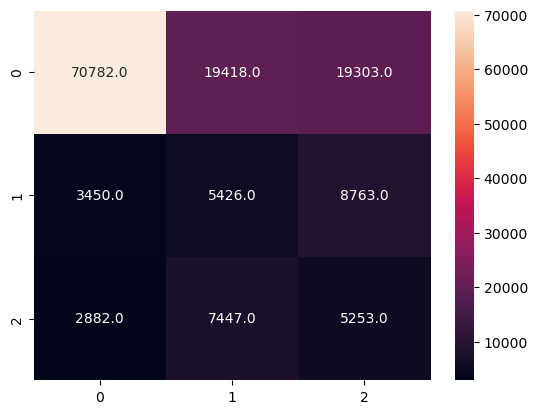

In [363]:
con=model_evaluation(rdmf_predict)
evaluation_table  = pd.DataFrame(data= con,columns=[0,1,2],index=['rf_0','rf_1','rf_2'])


In [364]:
plt.figure(figsize=(20,15))


# plt.subplot(2,2,1)
roc= Roc_curve(y_test,rdmf_predict_proba_0)
roc_graph(roc,'random forest')

# plt.subplot(2,2,2)
roc= Roc_curve(y_test,rdmf_predict_proba_1)
roc_graph(roc,'random forest')


# plt.subplot(2,2,3)
roc= Roc_curve(y_test,rdmf_predict_proba_2)
roc_graph(roc,'random forest')

<Figure size 2000x1500 with 0 Axes>

### KNN Evaluation 

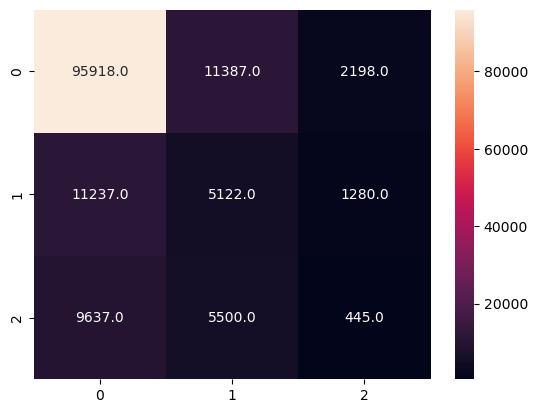

In [365]:
con= model_evaluation(knn_predict)
val = pd.DataFrame(data =con,columns=[0,1,2],index =['knn_0','knn_1','knn_2'])
evaluation_table= pd.concat([evaluation_table,val], axis=0)


In [366]:
plt.figure(figsize=(20,15))


# plt.subplot(2,2,1)
roc= Roc_curve(y_test,knn_predict_proba_0)
roc_graph(roc,'KNN')

# plt.subplot(2,2,2)
roc= Roc_curve(y_test,knn_predict_proba_1)
roc_graph(roc,'KNN')


# plt.subplot(2,2,3)
roc= Roc_curve(y_test,knn_predict_proba_2)
roc_graph(roc,'KNN')

<Figure size 2000x1500 with 0 Axes>

### Decision tree evaluation

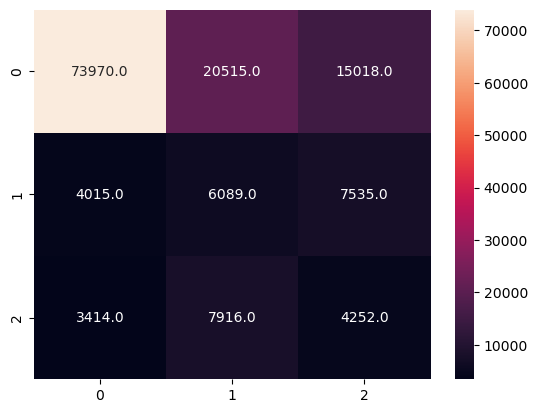

In [367]:
con= model_evaluation(dcsn_predict)
val = pd.DataFrame(data= con,columns=[0,1,2],index = ['dc_0','dc_1','dc_2'])
evaluation_table = pd.concat([evaluation_table,val],axis= 0)


In [368]:
plt.figure(figsize=(20,15))


# plt.subplot(2,2,1)
roc= Roc_curve(y_test,dcsn_predict_proba_0)
roc_graph(roc,'Decision tree')

# plt.subplot(2,2,2)
roc= Roc_curve(y_test,dcsn_predict_proba_1)
roc_graph(roc,'Decsion tree')


# # plt.subplot(2,2,3)
roc= Roc_curve(y_test,dcsn_predict_proba_2)
roc_graph(roc,'Decsion tree')


<Figure size 2000x1500 with 0 Axes>

### Naive Evaluation

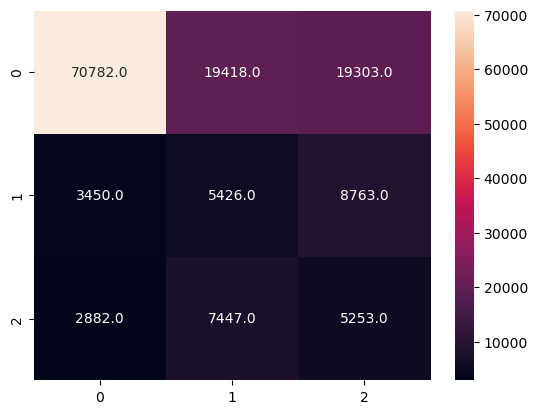

In [369]:
con =model_evaluation(rdmf_predict)
val = pd.DataFrame(data= con,columns=[0,1,2],index = ['nv_0','nv_1','nv_2'])
evaluation_table = pd.concat([evaluation_table,val],axis= 0)


In [370]:
plt.figure(figsize=(20,15))



roc= Roc_curve(y_test,nv_predict_proba_0)
roc_graph(roc,'Naive Bayes')



roc= Roc_curve(y_test,nv_predict_proba_1)
roc_graph(roc,'Naive Bayes')



roc= Roc_curve(y_test,nv_predict_proba_2)
roc_graph(roc,'Naive Bayes')

<Figure size 2000x1500 with 0 Axes>

In [374]:
evaluation_table

0      1      2
rf_0   70782  19418  19303
rf_1    3450   5426   8763
rf_2    2882   7447   5253
knn_0  95918  11387   2198
knn_1  11237   5122   1280
knn_2   9637   5500    445
dc_0   73970  20515  15018
dc_1    4015   6089   7535
dc_2    3414   7916   4252
nv_0   70782  19418  19303
nv_1    3450   5426   8763
nv_2    2882   7447   5253

##### Here we can see if our concern is to find out people who have no diabetics then Decesion tree would be the best choice based on this data

In [371]:
no_dibetics=  evaluation_table.iloc[::3,0:1]
a=  no_dibetics[{0}].max()[0]
no_dibetics[no_dibetics[{0}]==a].dropna(axis=0)


0
knn_0  95918.0

##### Here we can see if our concern is to find out people who have pre diabetics then Decesion tree would be the best choice based on data

In [372]:
pre_dibetics = evaluation_table.iloc[1::3,1:2]
b = pre_dibetics[{1}].max()[1]
pre_dibetics[ pre_dibetics[{1}]  ==b  ].dropna(axis=0)


1
dc_1  6089.0

##### Here we can see if our concern is to find out people who have no diabetics then random forest and naive bayes would be the best choice based on data

In [373]:
dibetics = evaluation_table.iloc[2::3,2:]
c =dibetics[{2}].max()[2]
dibetics[dibetics[{2}]==c].dropna(axis =0)

2
rf_2  5253.0
nv_2  5253.0